<a href="https://colab.research.google.com/github/NatnaelMengistu1/DS/blob/main/Intro_to_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import string 
import re
import nltk

## Text preprocessing 


In [ ]:
text = "If you were the NWS wth a rotating storm w/ a report of a 'HUGE' / 'MASSIVE' / 'VIOLENT' tornado what would you do? https://t.co/J3dI85IST5"

### De-Noise



In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
text_dn = re.sub(r'https?:\/\/.*[\r\n]*','',text)

In [ ]:
text_dn

"If you were the NWS wth a rotating storm w/ a report of a 'HUGE' / 'MASSIVE' / 'VIOLENT' tornado what would you do? "

In [ ]:
text_dn2 = "".join([char for char in text_dn if char not in string.punctuation])

In [ ]:
text_dn2

'If you were the NWS wth a rotating storm w a report of a HUGE  MASSIVE  VIOLENT tornado what would you do '

### Lower Case

In [ ]:
text_lc = text_dn2.lower()
text_lc

'if you were the nws wth a rotating storm w a report of a huge  massive  violent tornado what would you do '

### Remove Stop words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords = stopwords.words('english')

In [ ]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
split_words = text_lc.split(" ")

In [ ]:
print(split_words)

['if', 'you', 'were', 'the', 'nws', 'wth', 'a', 'rotating', 'storm', 'w', 'a', 'report', 'of', 'a', 'huge', '', 'massive', '', 'violent', 'tornado', 'what', 'would', 'you', 'do', '']


In [ ]:
filtered_words = [word for word in split_words if word not in stopwords]

In [ ]:
filtered_words = [word for word in filtered_words if word not in ['']]

In [ ]:
filtered_words

['nws',
 'wth',
 'rotating',
 'storm',
 'w',
 'report',
 'huge',
 'massive',
 'violent',
 'tornado',
 'would']

In [ ]:
filtered_text = " ".join(filtered_words)

In [ ]:
filtered_text

'nws wth rotating storm w report huge massive violent tornado would'

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
porter = PorterStemmer()

In [ ]:
stemmed_words = [porter.stem(word) for word in filtered_words]

'''
Stemmed_words=[]
for word in filtered_words:
  stemmed_words.append(porter.stem(word))
  '''
stemmed_words

['nw',
 'wth',
 'rotat',
 'storm',
 'w',
 'report',
 'huge',
 'massiv',
 'violent',
 'tornado',
 'would']

### Lemmatize

In [ ]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

In [ ]:
lemmatized_words

['nw',
 'wth',
 'rotating',
 'storm',
 'w',
 'report',
 'huge',
 'massive',
 'violent',
 'tornado',
 'would']

In [ ]:
porter.stem('caring')

'care'

In [ ]:
lemmatizer.lemmatize("better", pos = 'a')

'good'

In [ ]:
words = ["program" , "programming" , "programmer"]

In [ ]:
[porter.stem(word) for word in words ]

['program', 'program', 'programm']

In [ ]:
[lemmatizer.lemmatize(word) for word in words]

['program', 'programming', 'programmer']

### Preprocessing function

In [ ]:
def Text_Pre_Proc(text, steps=6):
  out_report=[]
  text_out = re.sub(r'https?:\/\/.*[\r\n]*','',text)
  out_report.append("removed links")
  if steps >1:
    text_out="".join([char for char in text_out if char not in string.punctuation])
    out_report.append("removed punct")
  if steps >3:
    text_out=text_out.lower()
    out_report.append("lower case")
  
  if steps >4:
    stop_words = stopwords.words('english')
    text_out=text_out.split(" ")
    text_out = [word for word in text_out if word not in stop_words]
    out_report.append("removed stop words")

  if steps>5:
    text_out=[porter.stem(word)
 for word in text_out]
    out_report.append("stemmed")
    
  return(text_out,out_report)

## Basic fault tolerance in Python

In [ ]:
def multiply_words(word_a, word_b):

  try:
    out = word_a*word_b

  except:
    out = word_a
    print("I survived")

  return out

In [ ]:
multiply_words(3,"Orange")

'OrangeOrangeOrange'

In [ ]:
multiply_words("Orange", "apple")

I survived


'Orange'

### Sentiment Analysis with Basic Swivel Embeddings

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
import tensorflow_datasets as tfds

In [ ]:
train_data, validation_data , test_data = tfds.load(
    name = "imdb_reviews",
    split = ('train[:60%]' , 'train[60%:]', 'test'),
    as_supervised= True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLRYYEI/imdb_reviews-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLRYYEI/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLRYYEI/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))

In [ ]:
train_examples_batch.shape

TensorShape([10])

In [ ]:
str(train_examples_batch[:1][0])

'tf.Tensor(b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it.", shape=(), dtype=string)'

In [ ]:
train_examples_batch[0]

<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">

In [ ]:
train_labels_batch[0]

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [ ]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"

In [ ]:
hub_layer = hub.KerasLayer(embedding , input_shape = [] , dtype=tf.string , trainable = True)

In [ ]:
hub_layer(train_examples_batch[:1])

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ]],
      dtype=float32)>

In [ ]:
model = keras.Sequential()

In [ ]:
from keras.layers.attention.multi_head_attention import activation
model.add(hub_layer)
model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(12, activation = 'relu'))
model.add(keras.layers.Dropout(.2))
model.add(keras.layers.Dense(6, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 20)                400020    
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 12)                132       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 400,447
Trainable params: 400,447
Non-trai

In [ ]:
model.compile(optimizer = 'Nadam' , loss = keras.losses.BinaryFocalCrossentropy(from_logits=True), metrics = ['accuracy'])    #SCHOTASTIC GRADIENT DESCENT

In [ ]:
history  = model.fit(train_data.shuffle(1000).batch(512), epochs= 40 , validation_data= validation_data.batch(512), verbose = 2)

Epoch 1/40


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


30/30 - 9s - loss: 0.1728 - accuracy: 0.5333 - val_loss: 0.1573 - val_accuracy: 0.5199 - 9s/epoch - 305ms/step
Epoch 2/40
30/30 - 3s - loss: 0.1601 - accuracy: 0.5394 - val_loss: 0.1527 - val_accuracy: 0.5371 - 3s/epoch - 105ms/step
Epoch 3/40
30/30 - 5s - loss: 0.1520 - accuracy: 0.5646 - val_loss: 0.1453 - val_accuracy: 0.5826 - 5s/epoch - 170ms/step
Epoch 4/40
30/30 - 2s - loss: 0.1432 - accuracy: 0.6083 - val_loss: 0.1362 - val_accuracy: 0.6525 - 2s/epoch - 78ms/step
Epoch 5/40
30/30 - 3s - loss: 0.1322 - accuracy: 0.6657 - val_loss: 0.1249 - val_accuracy: 0.7062 - 3s/epoch - 100ms/step
Epoch 6/40
30/30 - 3s - loss: 0.1192 - accuracy: 0.7277 - val_loss: 0.1125 - val_accuracy: 0.7435 - 3s/epoch - 95ms/step
Epoch 7/40
30/30 - 4s - loss: 0.1082 - accuracy: 0.7707 - val_loss: 0.1039 - val_accuracy: 0.7805 - 4s/epoch - 148ms/step
Epoch 8/40
30/30 - 2s - loss: 0.0978 - accuracy: 0.8029 - val_loss: 0.0968 - val_accuracy: 0.8016 - 2s/epoch - 77ms/step
Epoch 9/40
30/30 - 3s - loss: 0.0880 -

In [ ]:
results = model.evaluate(test_data.batch(512), verbose=2)

49/49 - 3s - loss: 0.2438 - accuracy: 0.8394 - 3s/epoch - 53ms/step


In [ ]:
model.predict(["I hated this , it was the worse"])> 0.5

1/1 [==============================] - 0s 159ms/step


array([[False]])

In [ ]:
model.predict(["This was awesome! Loved it. The director is the best"])> 0.5

1/1 [==============================] - 0s 49ms/step


array([[ True]])

## Textual Similarity and GOUSE( AKA universal sentence encoder)

In [ ]:
# module_url = 'https://tfhub.dev/google/universal-sentence-encoder/4'

module_url = 'https://tfhub.dev/google/universal-sentence-encoder-large/5'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub


In [ ]:
import os 
import re
import seaborn as sns
from numpy.linalg import norm

In [ ]:
model = hub.load(module_url)

In [ ]:
def cos_sim(a,b):
   return np.inner(a,b)/(norm(a)* norm(b))

In [ ]:
def euclidean_d(A,B):
  return norm(a-b)

In [ ]:
def embed(input):
  return model(input)

In [ ]:
words = "elephant"
sentences = "large land mammal with grey skin and tusks" 
paragraph = ("the largest existing land animals." "Three living species are currently recognised: the African bush, the African forest, and the Asian." "They are the only surviving members of the family and the order Proboscidea." "The order was formerly much more diverse during the Pleistocene, but most species became extinct during the Late Pleistocene epoch." "Distinctive features include a long proboscis called a trunk, tusks, large ear flaps, pillar-like legs, and tough but sensitive skin." "The trunk is used for breathing and is prehensile, bringing food and water to the mouth, and grasping objects." "Tusks, which are derived from the incisor teeth, serve both as weapons and as tools for moving objects and digging")

In [ ]:
messages = [words , sentence, paragraph]

In [ ]:
message_embeddings =  embed(messages)

In [ ]:
message_embeddings

<tf.Tensor: shape=(3, 512), dtype=float32, numpy=
array([[-0.03458565, -0.01799013,  0.00198055, ...,  0.1110782 ,
        -0.03549767,  0.05680304],
       [-0.05454745, -0.03807043, -0.02425123, ...,  0.08269341,
        -0.00213374, -0.04927434],
       [-0.05353455, -0.02588897, -0.05528885, ...,  0.05255833,
        -0.01975747,  0.06257731]], dtype=float32)>

In [ ]:
something_else = embed(["Transatlantic Airliner"])

In [ ]:
something_else

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 1.25010172e-02,  7.80898985e-03,  2.62319073e-02,
        -3.21493164e-04, -3.24431178e-03, -5.72202243e-02,
         5.21686040e-02, -5.52552752e-02, -3.08053680e-02,
         2.41832864e-02,  5.87084927e-02, -9.89421085e-03,
        -4.43287194e-02, -4.72072400e-02, -6.69728592e-02,
         5.58613203e-02, -4.49953564e-02,  2.48910505e-02,
        -3.51142958e-02, -4.31489833e-02, -3.68677010e-03,
        -6.47818483e-03, -2.56750863e-02,  6.70875609e-02,
         4.41263840e-02,  1.59758367e-02, -2.83600693e-03,
         2.92371009e-02, -1.46841649e-02, -8.13051388e-02,
         1.18244020e-02,  9.29804984e-03,  7.77722523e-02,
        -5.67398779e-02, -2.10815463e-02, -5.53856743e-03,
         2.80345324e-02, -1.99961476e-02, -8.10044643e-04,
        -1.17488615e-01,  3.61285694e-02,  1.84060838e-02,
         7.01874420e-02,  7.97188934e-03,  3.81952748e-02,
         2.88786571e-02,  7.05510229e-02, -3.73499817e-04,
      

In [ ]:
cos_sim(message_embeddings[0], message_embeddings[1])

0.3572755

In [ ]:
cos_sim(message_embeddings[0], something_else[0])

0.19920315

In [ ]:
messages = [
    #Food
    "Tacos",
    "Mole chicken with pickled onions",
    "French Onion soup",
    "Fish and Chips",

    #Movies

    "Gone with the Wind",
    "Star Wars",
    "Field of Dreams",
    "Starship troupers",

    #IT

    "404 Not found",
    "Kernel Panic",
    "syntax error",
    "Stack Overflow"



    #Misc
    "elephant",
    "large grey animal",
    "Mona Lisa",
    "Large gray animal"


]

In [ ]:
def plot_similarity(labels, features , rotation , sim_func = cos_sim , mult=2):
  corr = sim_func(features,features)*mult
  sns.set(font_scale = 1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin = 0,
      vmax = 1,
      cmap = "YlOrRd"
  )
  g.set_xticklabels(labels, rotation= rotation)
  g.set_title("Semantic Similarity")

In [ ]:
def run_and_plot( messages_, sim_func = cos_sim , mult = 2):
  embeddings = embed(messages_)
  plot_similarity(messages_ , embeddings, 90, sim_func , mult)

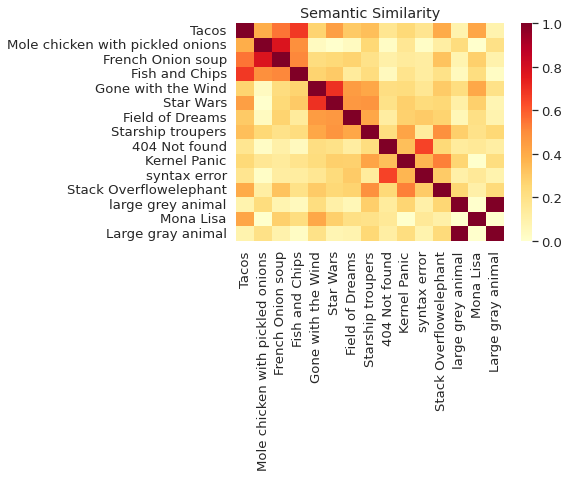

In [ ]:
run_and_plot(messages, mult = 25)

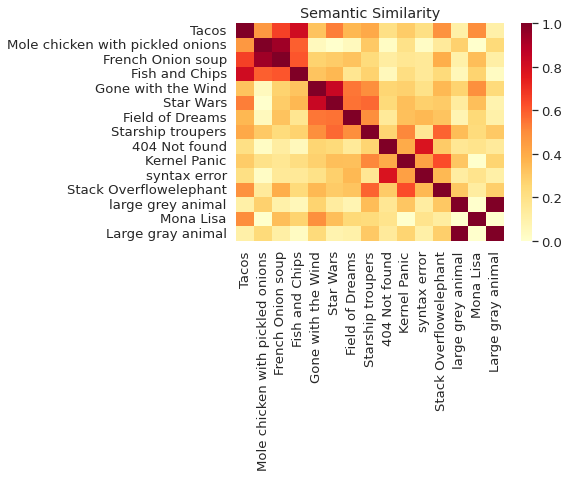

In [ ]:
run_and_plot(messages , sim_func = np.inner)

## Sentiment Analysis using BERT

In [ ]:
!pip install -q -U "tensorflow-text == 2.8.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 KB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 56.6 MB/s eta 0:00:00


In [ ]:
!pip install -q tf-models-official==2.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
import tensorflow_datasets as tfds

In [ ]:
import tensorflow_text as text
import os
import shutil

In [ ]:
tf.get_logger().setLevel('ERROR')

In [ ]:
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

In [ ]:
dataset = tf.keras.utils.get_file("aclImdb_v1.tar.gz" , url , untar = True, cache_dir='.' , cache_subdir="")

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

84140032/84125825 [==============================] - 2s 0us/step


In [ ]:
train_dir = os.path.join(dataset_dir,'train')
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42


raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train' ,
    batch_size=batch_size,
    validation_split = 0.2,
    subset = 'training',
    seed = seed
)

class_names = raw_train_ds.class_names
train_ds = raw_train_ds.cache().prefetch(buffer_size = AUTOTUNE)

val_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/aclImdb/train' ,
    batch_size=batch_size,
    validation_split = 0.2,
    subset = 'validation',
    seed = seed
)

val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

test_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/aclImdb/test' ,
    batch_size=batch_size
    )

test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)



Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


In [ ]:
le_encoder = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3"
le_preprocess="https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

In [ ]:
from sklearn import preprocessing

def build_classifier_model():
  text_input = tf.keras.layers.Input(shape= (), dtype= tf.string , name = 'text')
  preprocessing_layer = hub.KerasLayer(le_preprocess, name = "preprocessing")
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(le_encoder, trainable=True , name = 'BERT_Encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']

  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name = 'Classifier')(net)

  return tf.keras.Model(text_input, net)




In [ ]:
classifier_model = build_classifier_model()

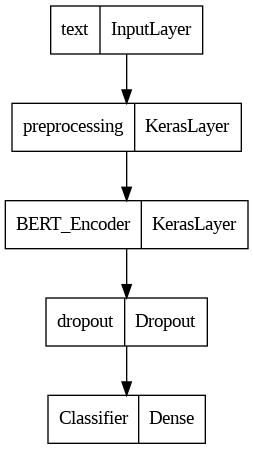

In [ ]:
tf.keras.utils.plot_model(classifier_model)

In [ ]:
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [ ]:
# optimizer for 
from official.nlp import optimization

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [ ]:
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1* num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(
  init_lr = init_lr,
  num_train_steps = num_train_steps,
  num_warmup_steps=num_warmup_steps,
  optimizer_type = 'adamw'
)

In [ ]:
steps_per_epoch

625

In [ ]:
from sklearn.utils import optimize
classifier_model.compile(optimizer = optimizer , loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
                         metrics = tf.metrics.BinaryAccuracy())

In [ ]:
history = classifier_model.fit(x=train_ds , validation_data=val_ds , epochs = epochs)

Epoch 1/5
625/625 [==============================] - 695s 1s/step - loss: 0.3980 - binary_accuracy: 0.8014 - val_loss: 0.3130 - val_binary_accuracy: 0.8722
Epoch 2/5
625/625 [==============================] - 671s 1s/step - loss: 0.2197 - binary_accuracy: 0.9114 - val_loss: 0.3737 - val_binary_accuracy: 0.8738
Epoch 3/5
625/625 [==============================] - 672s 1s/step - loss: 0.1208 - binary_accuracy: 0.9592 - val_loss: 0.4518 - val_binary_accuracy: 0.8782
Epoch 4/5
625/625 [==============================] - 671s 1s/step - loss: 0.0628 - binary_accuracy: 0.9825 - val_loss: 0.5964 - val_binary_accuracy: 0.8754
Epoch 5/5
625/625 [==============================] - 671s 1s/step - loss: 0.0321 - binary_accuracy: 0.9918 - val_loss: 0.6284 - val_binary_accuracy: 0.8818


### Model Serialization

In [ ]:
dataset_name = 'imdb/2/45'
saved_model_path = '/content/drive/MyDrive/DA/{}_bert'.format(dataset_name.replace('/', '_'))



In [ ]:
classifier_model.save(saved_model_path , include_optimizer = False)

In [ ]:
reloaded_model = tf.saved_model.load("/content/drive/MyDrive/DA/imdb_2_45_bert")

In [ ]:
examples = ['This is the best movie ever, just kidding']

In [ ]:
tf.sigmoid(reloaded_model(tf.constant(examples)))[0][0]

<tf.Tensor: shape=(), dtype=float32, numpy=0.99627054>

## K- means clustering



In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [16]:
N = 3000
dims = 2
X = []
means = []
k = 3


for i in range(k):
  X.append(np.random.randn(N, dims) + np.random.randn(1, dims) * 3.4)
  means.append(np.mean(X[-1], axis = 0))


X = np.vstack(X)
means = np.vstack(means)

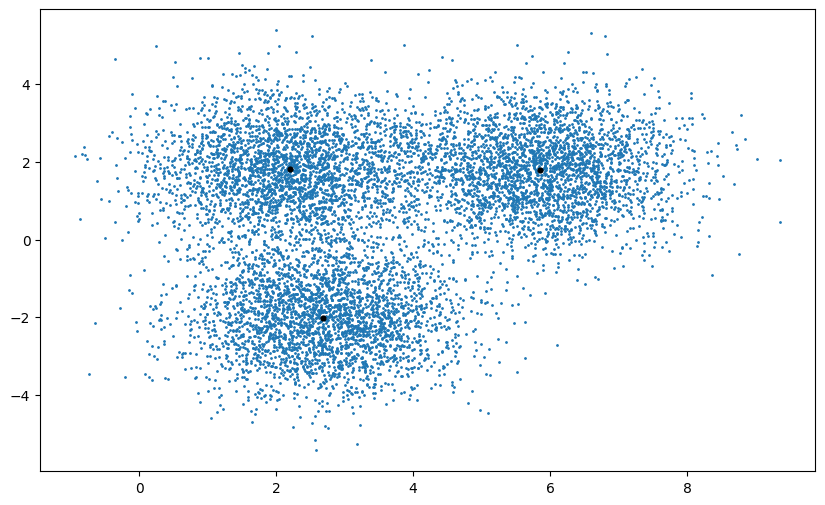

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1] , s=1)
plt.scatter(means[:,0], means[:,1], c = 'k', s=12)

In [18]:
'''
def Distance(x, means , *args , **kwargs):
  diff= []
  dists = []
  for mean in means:
    diff = x - means
    dist = np.sqrt(np.sum(diff**2, axis = 1, keepdims=True))
    dists.append(dist)
  return np.hstack(dists)
'''

def Distance(x, means, *args, **kwargs):
  diff = []
  dists = []
  for mean in means:
    diff = x - mean
    dist = np.sqrt(np.sum(diff**2, axis=1, keepdims=True))
    dists.append(dist)
  return np.hstack(dists)



In [19]:
dist = Distance(X ,means)
y_hat = np.argmin(dist, axis = 1)

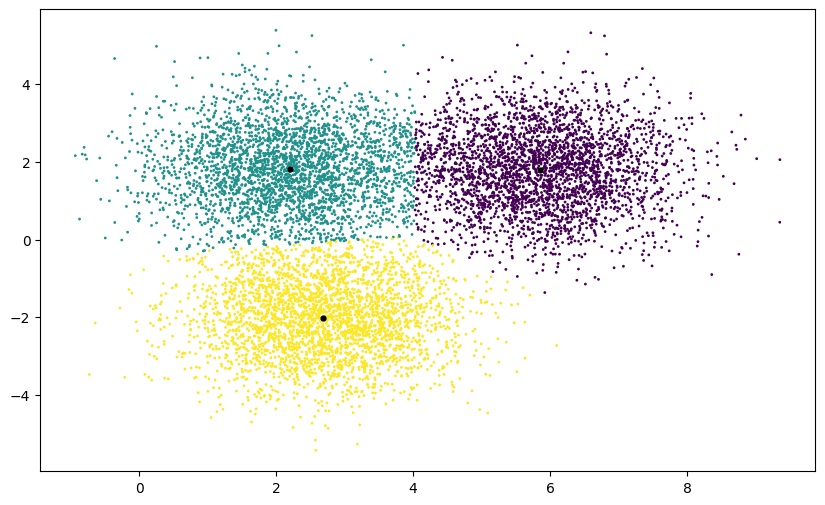

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y_hat, s=1)
plt.scatter(means[:,0], means[:,1], c='k' , s=12)

In [23]:
mean = []

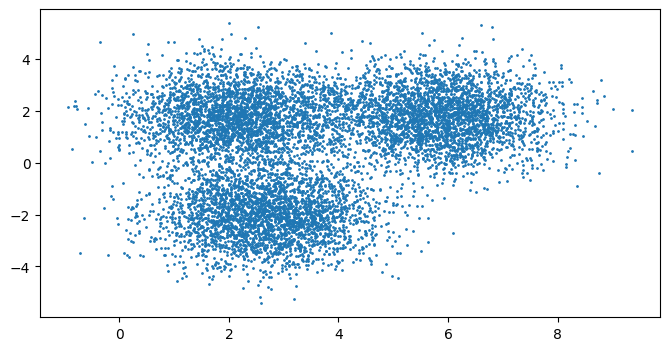

In [24]:
plt.figure(figsize=(8,4))
plt.scatter(X[:,0], X[:,1] , s=1)

In [25]:
# Random points on the plot
indices = np.array(X.shape[0])
sample_indices = np.random.choice(indices, size = k , replace = False)
means = X[sample_indices]

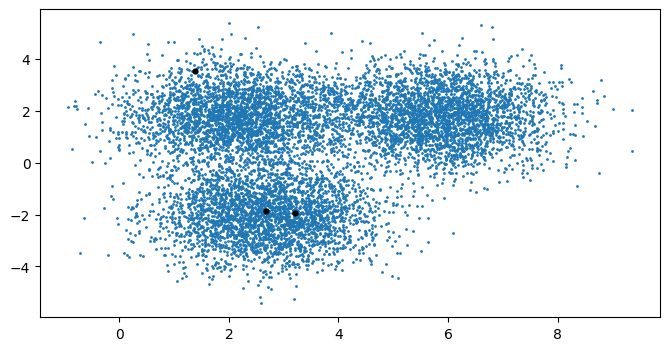

In [26]:
plt.figure(figsize=(8,4))
plt.scatter(X[:,0], X[:,1] , s=1)
plt.scatter(means[:,0], means[:,1], c = 'k', s=12)

In [44]:
dist = Distance(X, means)
y_hat = np.argmin(dist, axis = 1)

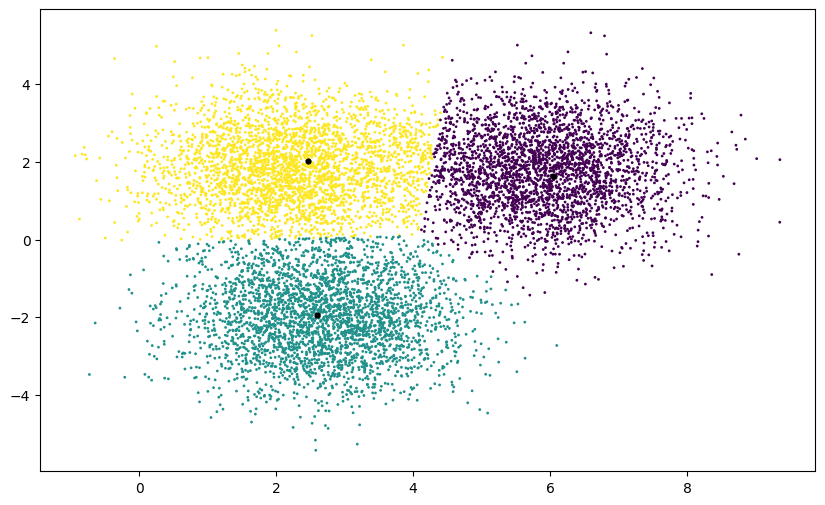

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1] ,c = y_hat, s=1)
plt.scatter(means[:,0], means[:,1], c = 'k', s=12)

In [46]:
means = []
for i in range(k):
  mean = np.mean(X[y_hat == i], axis = 0)
  means.append(mean)
means = np.vstack(means)

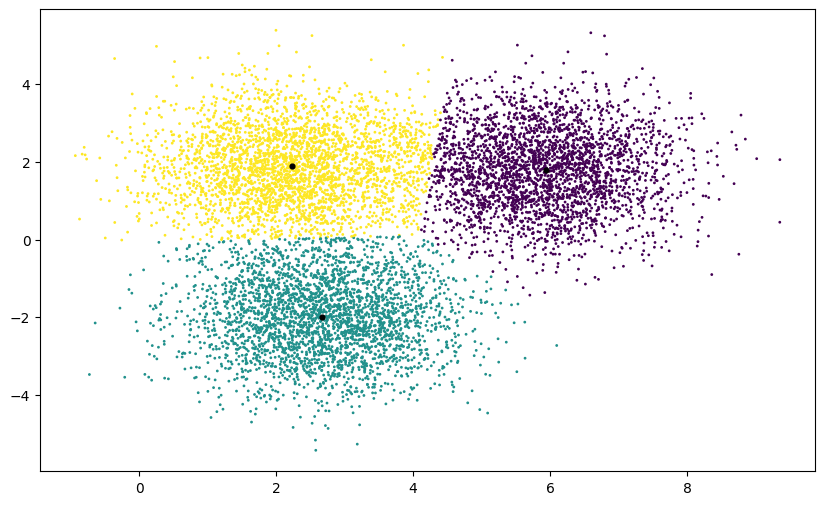

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1] ,c = y_hat , s=1)
plt.scatter(means[:,0], means[:,1], c = 'k', s=12)

In [33]:
means

array([[ 2.07279922, -1.50060074],
       [ 2.07279922, -1.50060074],
       [ 2.07279922, -1.50060074]])

In [48]:
def KMeans(X , k , iterations = 3):
  indices = np.arange(X.shape[0])
  sample_indices = np.random.choice(indices, size = k , replace = False)
  means = X[sample_indices]

  for i in range(iterations):
    dist = Distance(X , means)
    y_hat = np.argmin(dist , axis = 1)
    means = []

    for n in range(k):
      mean = np.mean(X[y_hat == n], axis = 0)
      means.append(mean)
    means = np.vstack(means)

  dist = Distance(X, means)
  y_hat = np.argmin(dist , axis = 1)
  return y_hat ,means

In [49]:
y_hat , means = KMeans(X, 3, iterations= 30)


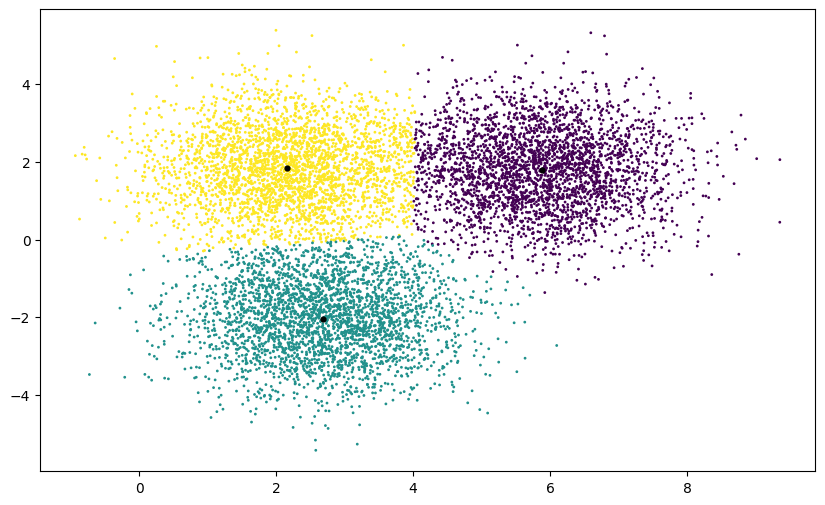

In [50]:
y_hat, means = KMeans(X, 3, iterations=30)

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y_hat, s=1)
plt.scatter(means[:,0], means[:,1], c='k', s=12)

## Unsupervised NLP

In [51]:
import numpy as np
import numpy.linalg as lg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import os
import re

import tensorflow as tf
import tensorflow_hub as hub

In [52]:
module_url="https://tfhub.dev/google/universal-sentence-encoder/4"
embedder=hub.load(module_url)

In [53]:
def TextPreProcessing(sentence):
 
  clean_sentence = re.sub(r'https?:\/\/.*[\r\n]*','', sentence)

  return clean_sentence

In [54]:
def data_load(filename):
  data = pd.read_csv(filename, header=0, encoding='iso-8859-1')
  X=data.Tweet
  return X

In [55]:
X = data_load('/content/drive/MyDrive/DA/data_elonmusk2.csv')

In [56]:
def embed(sentence):
  sentence_in=[sentence]
  return embedder(sentence_in)

In [57]:
def LoadVectors(X):
  Dict_of_Sentences =dict()
  for i in range(len(X)):
    Dict_of_Sentences[i]= {"Sentence":X[i], "vector": embed(TextPreProcessing(X[i]))}
  return Dict_of_Sentences

In [58]:
My_NLP_dict = LoadVectors(X)

In [ ]:
My_NLP_dict

In [73]:
vector_tweets=[]
for i in range(len(X)):
  vector_tweets.append(np.hstack(My_NLP_dict[i]["vector"].numpy()))
vector_tweets = np.vstack(vector_tweets)

In [74]:
vector_tweets

array([[-0.00965879, -0.04810885, -0.01978337, ...,  0.04759962,
        -0.01902035,  0.02726131],
       [ 0.01734014, -0.06106212, -0.06993026, ...,  0.02043621,
        -0.01934775, -0.01334569],
       [ 0.04200513, -0.02571636,  0.00646962, ..., -0.04399165,
         0.00909324, -0.0591082 ],
       ...,
       [-0.03936958, -0.05778861,  0.00208142, ...,  0.04549707,
        -0.04390394, -0.08201447],
       [ 0.015135  , -0.03059486,  0.0083988 , ...,  0.01190017,
        -0.01498929, -0.01211823],
       [ 0.008053  , -0.02514687,  0.00782772, ...,  0.02444937,
         0.04813436, -0.04135375]], dtype=float32)

In [80]:
class K_Means:
  def __init__(self, k, distance_func=Distance, beta=None):
    self.k=k
    self.distance_func=distance_func
    self.beta=beta

  def Fit(self,X,iterations=5):
    indices = np.arange(X.shape[0])
    sample_indices = np.random.choice(indices,size=self.k,replace=False)
    self.means = X[sample_indices]

    for i in range(iterations):
      y_hat = self.Predict(X)
      self.means=[]
      for j in range(self.k):
        mean=np.mean(X[y_hat==j], axis=0)
        self.means.append(mean)
      self.means=np.vstack(self.means)

    y_hat=self.Predict(X)
    plt.figure(figsize=(10,7))
    plt.scatter(X[:,0],X[:,1],s=1,c=y_hat)
    plt.scatter(self.means[:,0],self.means[:,1], c='k',s=10)

    return y_hat
  
  def Predict(self,X):
    dist=self.distance_func(X,self.means,self.beta)
    y_hat = np.argmin(dist,axis=1)
    return y_hat

In [77]:
def Responsibility(X,means,beta=1e-3,*args,**kwargs):
  diff=[]
  responsibilities=[]

  for mean in means:
    diff =X -mean
    dist =(np.sum(diff ** 2,axis=1,keepdims=True))

    numerator= np.exp(-(beta*dist))
    denominator=np.sum(numerator)
    responsibility=-numerator/denominator

    responsibilities.append(responsibility)
  return np.hstack(responsibilities)

In [81]:
K = 10
tweetcluster = K_Means(K ,distance_func= Responsibility , beta = 3)

array([2, 5, 6, ..., 2, 9, 3])

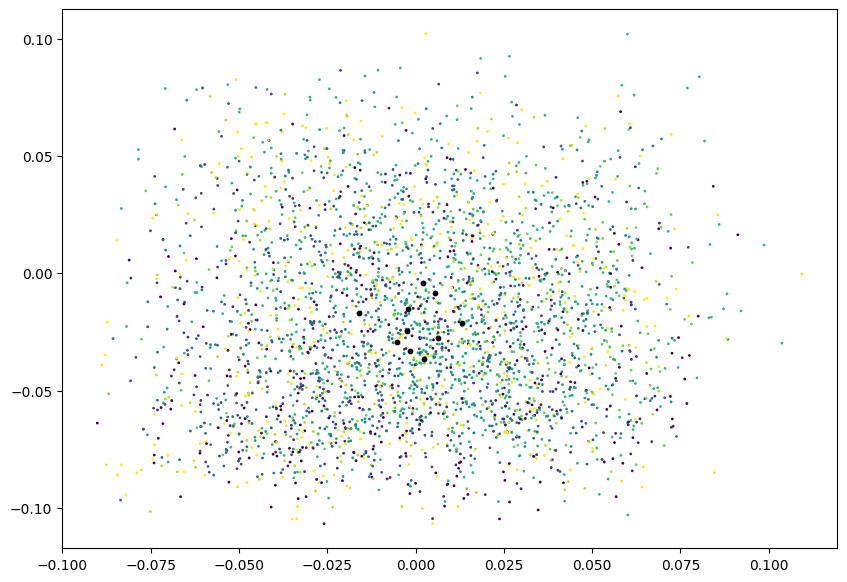

In [82]:
tweetcluster.Fit(vector_tweets , iterations= 30)

In [83]:
y_hat = tweetcluster.Predict(vector_tweets)

In [84]:
for i in range(len(X)):
  My_NLP_dict[i]['cluster'] = y_hat[i]


In [68]:
Clusters_DF=pd.DataFrame.from_dict(My_NLP_dict,orient='index')

In [85]:
Clusters_DF

,Sentence,vector,cluster
0,@MeltingIce Assuming max acceleration of 2 to ...,"((tf.Tensor(-0.009658788, shape=(), dtype=floa...",1
1,RT @SpaceX: BFR is capable of transporting sat...,"((tf.Tensor(0.01734014, shape=(), dtype=float3...",4
2,@bigajm Yup :),"((tf.Tensor(0.042005133, shape=(), dtype=float...",0
3,Part 2 https://t.co/8Fvu57muhM,"((tf.Tensor(-0.030215798, shape=(), dtype=floa...",3
4,Fly to most places on Earth in under 30 mins a...,"((tf.Tensor(-0.070373185, shape=(), dtype=floa...",6
...,...,...,...
3213,"@YOUSRC Amos's article was fair, but his edito...","((tf.Tensor(0.034133054, shape=(), dtype=float...",5
3214,These articles in Space News describe why Aria...,"((tf.Tensor(0.01769875, shape=(), dtype=float3...",2
3215,Was misquoted by BBC as saying Europe's rocket...,"((tf.Tensor(-0.03936958, shape=(), dtype=float...",1
3216,Just returned from a trip to London and Oxford...,"((tf.Tensor(0.015134998, shape=(), dtype=float...",5


In [70]:
lengths = []
for i in range(K):
  print(lengths)
  lengths.append(len(Clusters_DF[Clusters_DF['cluster'] == i]))

[]
[615]
[615, 269]
[615, 269, 149]
[615, 269, 149, 237]
[615, 269, 149, 237, 344]
[615, 269, 149, 237, 344, 367]
[615, 269, 149, 237, 344, 367, 287]
[615, 269, 149, 237, 344, 367, 287, 476]
[615, 269, 149, 237, 344, 367, 287, 476, 216]


In [71]:
lengths

[615, 269, 149, 237, 344, 367, 287, 476, 216, 258]

In [72]:
Clusters_DF[Clusters_DF['cluster'] == 8].drop(['vector'], axis = 1)

,Sentence,cluster
38,"RT @FastCompany: During Irma?s power outages, ...",8
48,@AndrewKemendo Govts don't need to follow norm...,8
49,@ItchGrid Should be low on our list of concern...,8
50,@SethicusGP NK launching a nuclear missile wou...,8
51,@JakeBlueatSM May be initiated not by the coun...,8
...,...,...
3191,Interesting possible answer to the Fermi Parad...,8
3194,Uranium ore now available on Amazon! So much m...,8
3198,But if humanity wishes to become a multi-plane...,8
3200,"Millions of people needed for Mars colony, so ...",8
